1.Loading the data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/AAPL.csv')

In [ ]:
df.shape

(10468, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


2.Data Preprocessing

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [ ]:
#Converting the 'Date' column into 'datetime' dtype
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [ ]:
#making the 'Date' col as index
df.set_index('Date' , inplace =True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
#sorting Indexes
df.sort_index(inplace=True)

In [ ]:
#data normalization
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [ ]:
scaler_values

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.31981003e-02],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 2.36989104e-02],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 1.42459064e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

In [ ]:
df_scaled = pd.DataFrame(scaler_values, columns = df.columns, index = df.index)

In [ ]:
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897


3.Plotting the columns

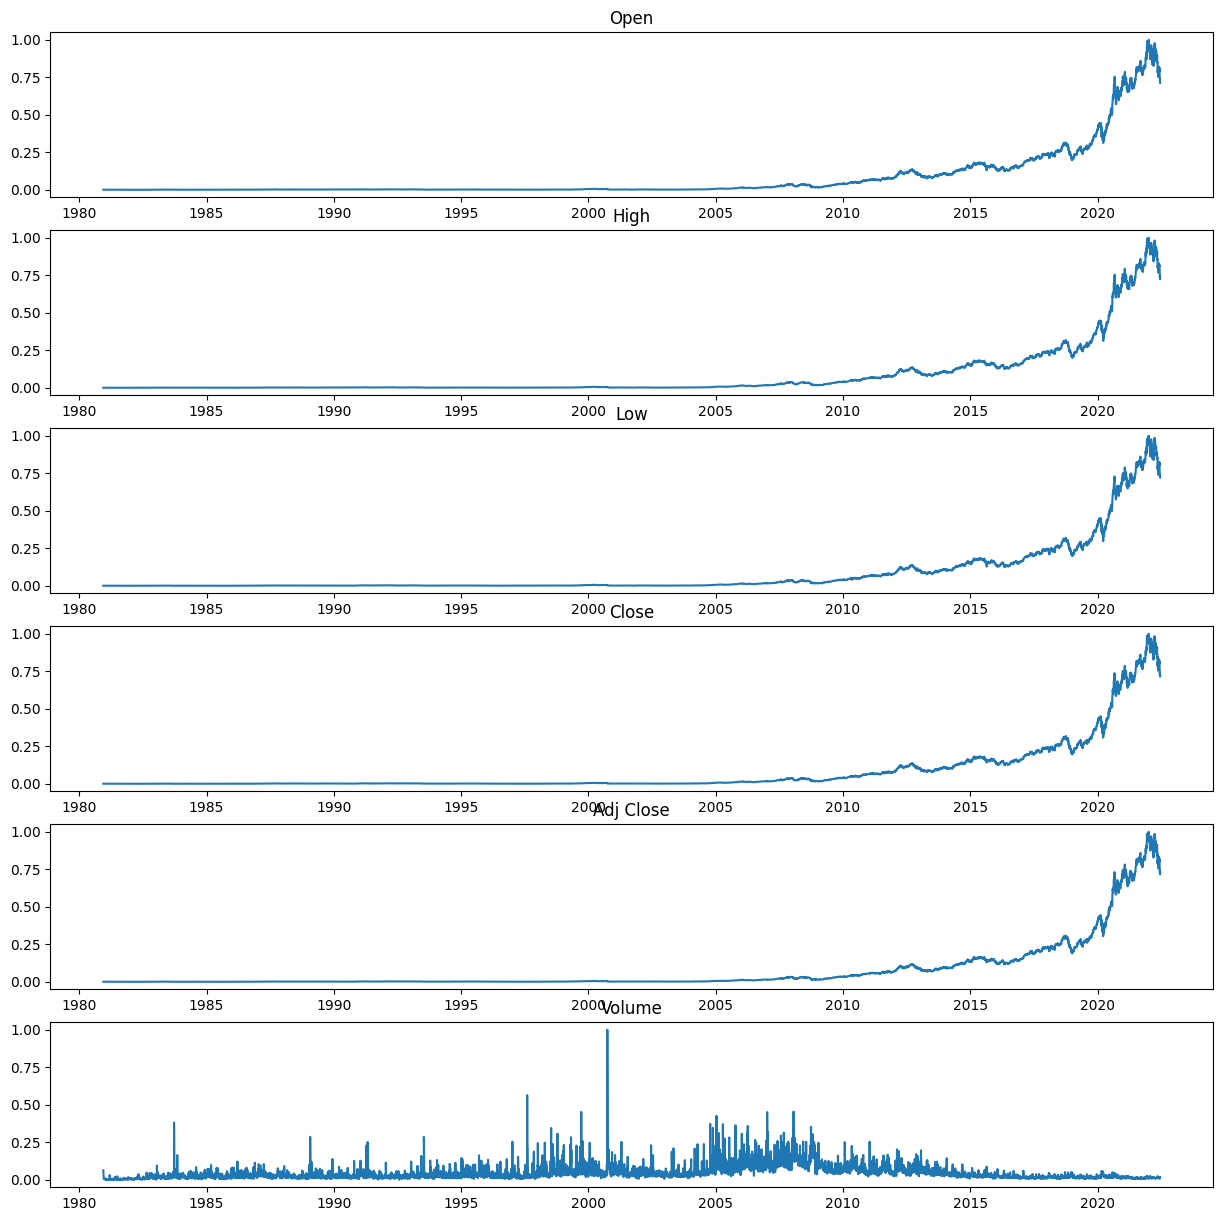

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes,df_scaled.columns):
  ax.plot(df_scaled[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible('False')

4.Creating the sliding window sequences

In [ ]:
##[1, 2, 3,...10]
# window_size = 3
#[1, 2, 3 ] →  [4]
#[2, 3, 4 ] →  [5]
#[3, 4, 5 ] →  [6]

In [ ]:
def create_sequence(data,window_size):
  X = []
  y = []
  for i in range(window_size,len(data)):
    X.append(data.iloc[i-window_size:i].values)
    y.append(data.iloc[i].values)
  return np.array(X),np.array(y)

In [ ]:
window_size = 60
X,y = create_sequence(df_scaled,window_size)

In [ ]:
X.shape, y.shape

((10408, 60, 6), (10408, 6))

In [ ]:
X

array([[[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
         3.40815838e-04, 6.31981003e-02],
        [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
         3.12018225e-04, 2.36989104e-02],
        [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
         2.73615897e-04, 1.42459064e-02],
        ...,
        [3.60652193e-04, 3.60040892e-04, 3.64604212e-04, 3.58813373e-04,
         2.80812545e-04, 1.56342786e-03],
        [3.08696982e-04, 3.08173745e-04, 3.14746862e-04, 3.09747884e-04,
         2.42415728e-04, 2.06444914e-03],
        [2.81185806e-04, 2.80709199e-04, 2.86696518e-04, 2.82143050e-04,
         2.20809252e-04, 3.82406004e-03]],

       [[3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
         3.12018225e-04, 2.36989104e-02],
        [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
         2.73615897e-04, 1.42459064e-02],
        [3.60652193e-04, 3.63091900e-04, 3.70836381e-04, 3.649465

In [ ]:
y

array([[2.62848673e-04, 2.62403147e-04, 2.64883927e-04, 2.60676899e-04,
        2.04013400e-04, 4.02326127e-03],
       [2.78129617e-04, 2.80709199e-04, 2.86696518e-04, 2.82143050e-04,
        2.20809252e-04, 7.98314033e-03],
       [2.75073428e-04, 2.74607182e-04, 2.80464349e-04, 2.76009864e-04,
        2.16009650e-04, 3.11659384e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

5.Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train.shape, X_test.shape

((8326, 60, 6), (2082, 60, 6))

In [ ]:
X_train.shape[1], X_train.shape[2]

(60, 6)

In [ ]:
y_train.shape[1]

6

6. Building LSTM Model

In [ ]:
model = keras.Sequential([
    #adding the first LSTM layer
    keras.layers.LSTM(units = 50, return_sequences= True, input_shape = [X_train.shape[1], X_train.shape[2]]),
    keras.layers.Dropout(0.3),


    #adding the second LSTM layer
    keras.layers.LSTM(units = 50, return_sequences= True),
    keras.layers.Dropout(0.3),

    #adding the third LSTM layer
    keras.layers.LSTM(units = 50, return_sequences= False),
    keras.layers.Dropout(0.3),


    #adding output layer
    keras.layers.Dense(y_train.shape[1]),



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compilation
model.compile(optimizer= 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [ ]:
#early stopping
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

In [ ]:
lstm_model = model.fit(X_train, y_train,
                       validation_split = 0.2,
                       epochs = 100,
                       batch_size = 3,
                       callbacks = [early_stopping])

Epoch 1/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 139s 60ms/step - RootMeanSquaredError: 0.0536 - loss: 0.0029 - val_RootMeanSquaredError: 0.0208 - val_loss: 4.3207e-04
Epoch 2/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 138s 58ms/step - RootMeanSquaredError: 0.0402 - loss: 0.0016 - val_RootMeanSquaredError: 0.0318 - val_loss: 0.0010
Epoch 3/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 137s 56ms/step - RootMeanSquaredError: 0.0326 - loss: 0.0011 - val_RootMeanSquaredError: 0.0205 - val_loss: 4.2123e-04
Epoch 4/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - RootMeanSquaredError: 0.0320 - loss: 0.0010 - val_RootMeanSquaredError: 0.0209 - val_loss: 4.3548e-04
Epoch 5/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - RootMeanSquaredError: 0.0325 - loss: 0.0011 - val_RootMeanSquaredError: 0.0258 - val_loss: 6.6497e-04
Epoch 6/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 149s 60ms/step - RootMeanSquaredError: 0.0316 - loss: 0.0010 - val_RootMeanSquaredError: 0.0210 - val_loss: 4.3993e-04
Epoch 7/100
2220/2220 ━━━━━━━━━━

In [ ]:
lstm_model.history

{'RootMeanSquaredError': [0.04582851380109787,
  0.03848244622349739,
  0.03296789526939392,
  0.030812153592705727,
  0.030705487355589867,
  0.030509011819958687,
  0.029870234429836273,
  0.028586318716406822,
  0.029140152037143707,
  0.027501534670591354,
  0.027496905997395515,
  0.02792167477309704,
  0.027174392715096474,
  0.027892543002963066,
  0.02650204487144947,
  0.026738282293081284,
  0.02635575830936432,
  0.025156117975711823,
  0.026139650493860245,
  0.025538675487041473,
  0.02573307231068611,
  0.025971675291657448,
  0.025179563090205193,
  0.026119040325284004,
  0.02561308816075325,
  0.024809353053569794],
 'loss': [0.0021002525463700294,
  0.0014808985870331526,
  0.0010868821991607547,
  0.000949388777371496,
  0.0009428269695490599,
  0.0009307998116128147,
  0.0008922310080379248,
  0.0008171775843948126,
  0.0008491484331898391,
  0.0007563344552181661,
  0.0007560797967016697,
  0.0007796199643053114,
  0.0007384475902654231,
  0.0007779939915053546,
  

In [ ]:
predictions = model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step


7.Forecasting the Data

In [ ]:
predictions[:10]

array([[0.00252476, 0.00270983, 0.00256972, 0.00269321, 0.0013181 ,
        0.0388948 ],
       [0.00574862, 0.00598919, 0.00582933, 0.00595254, 0.00431034,
        0.04480194],
       [0.27861562, 0.28354833, 0.28200516, 0.2820222 , 0.2737546 ,
        0.02138091],
       [0.17058921, 0.17363521, 0.17271674, 0.17271912, 0.16623907,
        0.03012194],
       [0.00310536, 0.00335496, 0.00307981, 0.00321754, 0.00086661,
        0.08233082],
       [0.00222399, 0.00241067, 0.00228348, 0.00238899, 0.00107947,
        0.0348945 ],
       [0.00369032, 0.00395425, 0.00361231, 0.00377286, 0.00093445,
        0.10456635],
       [0.00296568, 0.00315939, 0.00302634, 0.00313646, 0.00175147,
        0.0369491 ],
       [0.0025386 , 0.00271715, 0.00259635, 0.00270887, 0.00142232,
        0.03351939],
       [0.00239124, 0.00256791, 0.00245076, 0.00255997, 0.00130346,
        0.03225736]], dtype=float32)

In [ ]:
#inverse scaling
prediction = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [ ]:
predictions[:10]

array([[0.00252476, 0.00270983, 0.00256972, 0.00269321, 0.0013181 ,
        0.0388948 ],
       [0.00574862, 0.00598919, 0.00582933, 0.00595254, 0.00431034,
        0.04480194],
       [0.27861562, 0.28354833, 0.28200516, 0.2820222 , 0.2737546 ,
        0.02138091],
       [0.17058921, 0.17363521, 0.17271674, 0.17271912, 0.16623907,
        0.03012194],
       [0.00310536, 0.00335496, 0.00307981, 0.00321754, 0.00086661,
        0.08233082],
       [0.00222399, 0.00241067, 0.00228348, 0.00238899, 0.00107947,
        0.0348945 ],
       [0.00369032, 0.00395425, 0.00361231, 0.00377286, 0.00093445,
        0.10456635],
       [0.00296568, 0.00315939, 0.00302634, 0.00313646, 0.00175147,
        0.0369491 ],
       [0.0025386 , 0.00271715, 0.00259635, 0.00270887, 0.00142232,
        0.03351939],
       [0.00239124, 0.00256791, 0.00245076, 0.00255997, 0.00130346,
        0.03225736]], dtype=float32)

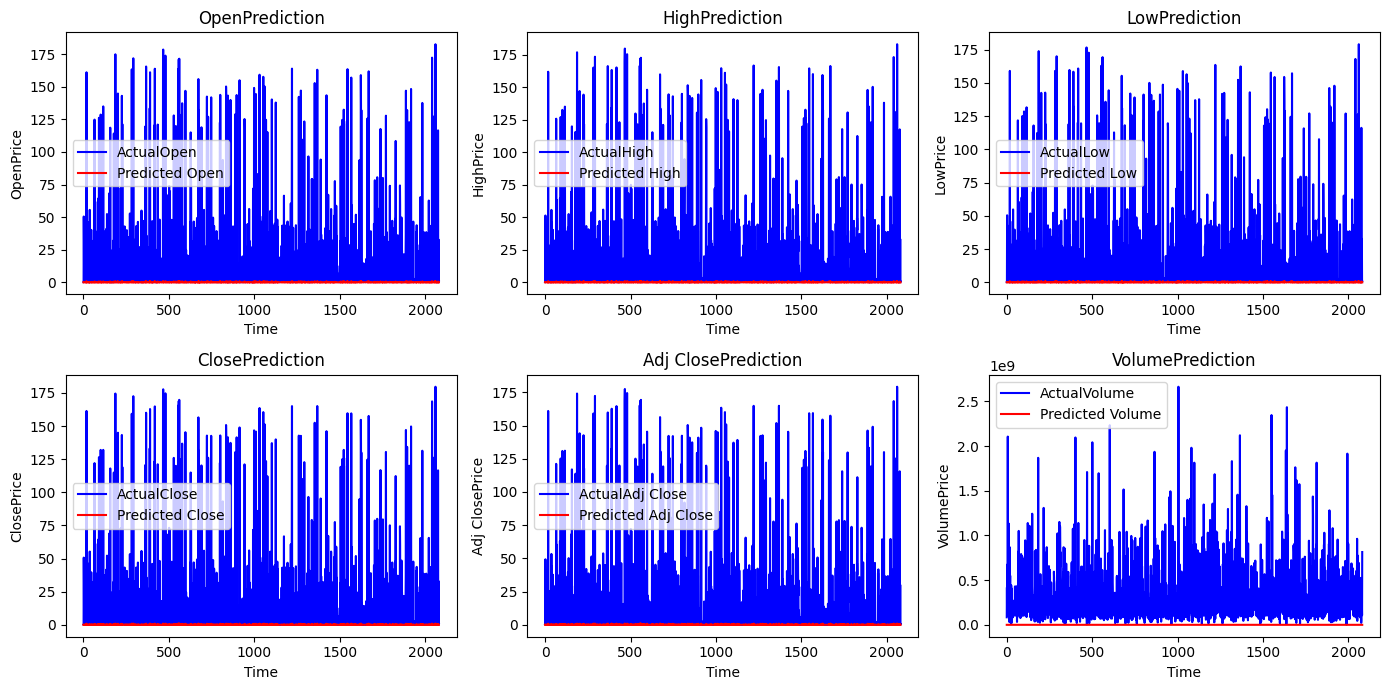

In [ ]:
#plotting the results
plt.figure(figsize = (14, 7))

for i , col in enumerate(df_scaled.columns):
  plt.subplot(2, 3, i+1)
  plt.plot(y_test_rescaled[:,i], color = 'blue', label = f'Actual{col}')
  plt.plot(predictions[:,i], color = 'red', label = f'Predicted {col}')
  plt.title(f'{col}Prediction')
  plt.xlabel('Time')
  plt.ylabel(f'{col}Price')
  plt.legend()


plt.tight_layout()